In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import osmnx as ox
from descartes import PolygonPatch
from shapely.geometry import Point, LineString, Polygon, MultiPolygon

epsg:4326


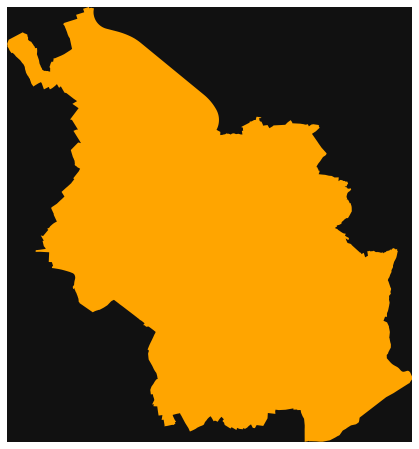

+proj=utm +zone=32 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs


In [3]:
# load city from openstreetmap using osmmnx api
city = ox.geocode_to_gdf("Cologne, Germany")
print(city.crs)
city = ox.projection.project_gdf(city)
fig, ax = ox.plot_footprints(city)
print(city.crs)

In [4]:
city.to_file('Cologne_city.shp')

In [5]:
city

geometry  \
0  POLYGON ((343914.677 5659037.268, 343914.683 5...   

                                 place_name  bbox_north  bbox_south  \
0  Cologne, North Rhine-Westphalia, Germany   51.084974    50.83044   

   bbox_east  bbox_west  
0   7.162028    6.77253

In [6]:
geometry = city['geometry'].iloc[0] #saving poligon from DataFrame as a variable
print(type(geometry))

<class 'shapely.geometry.polygon.Polygon'>


In [7]:
geometry_cut = ox.utils_geo._quadrat_cut_geometry(geometry, quadrat_width = 750)
print(type(geometry_cut))

<class 'shapely.geometry.multipolygon.MultiPolygon'>


<ipython-input-8-2755a72719bc>:11: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s=n, xy=p, horizontalalignment='center', size=15)


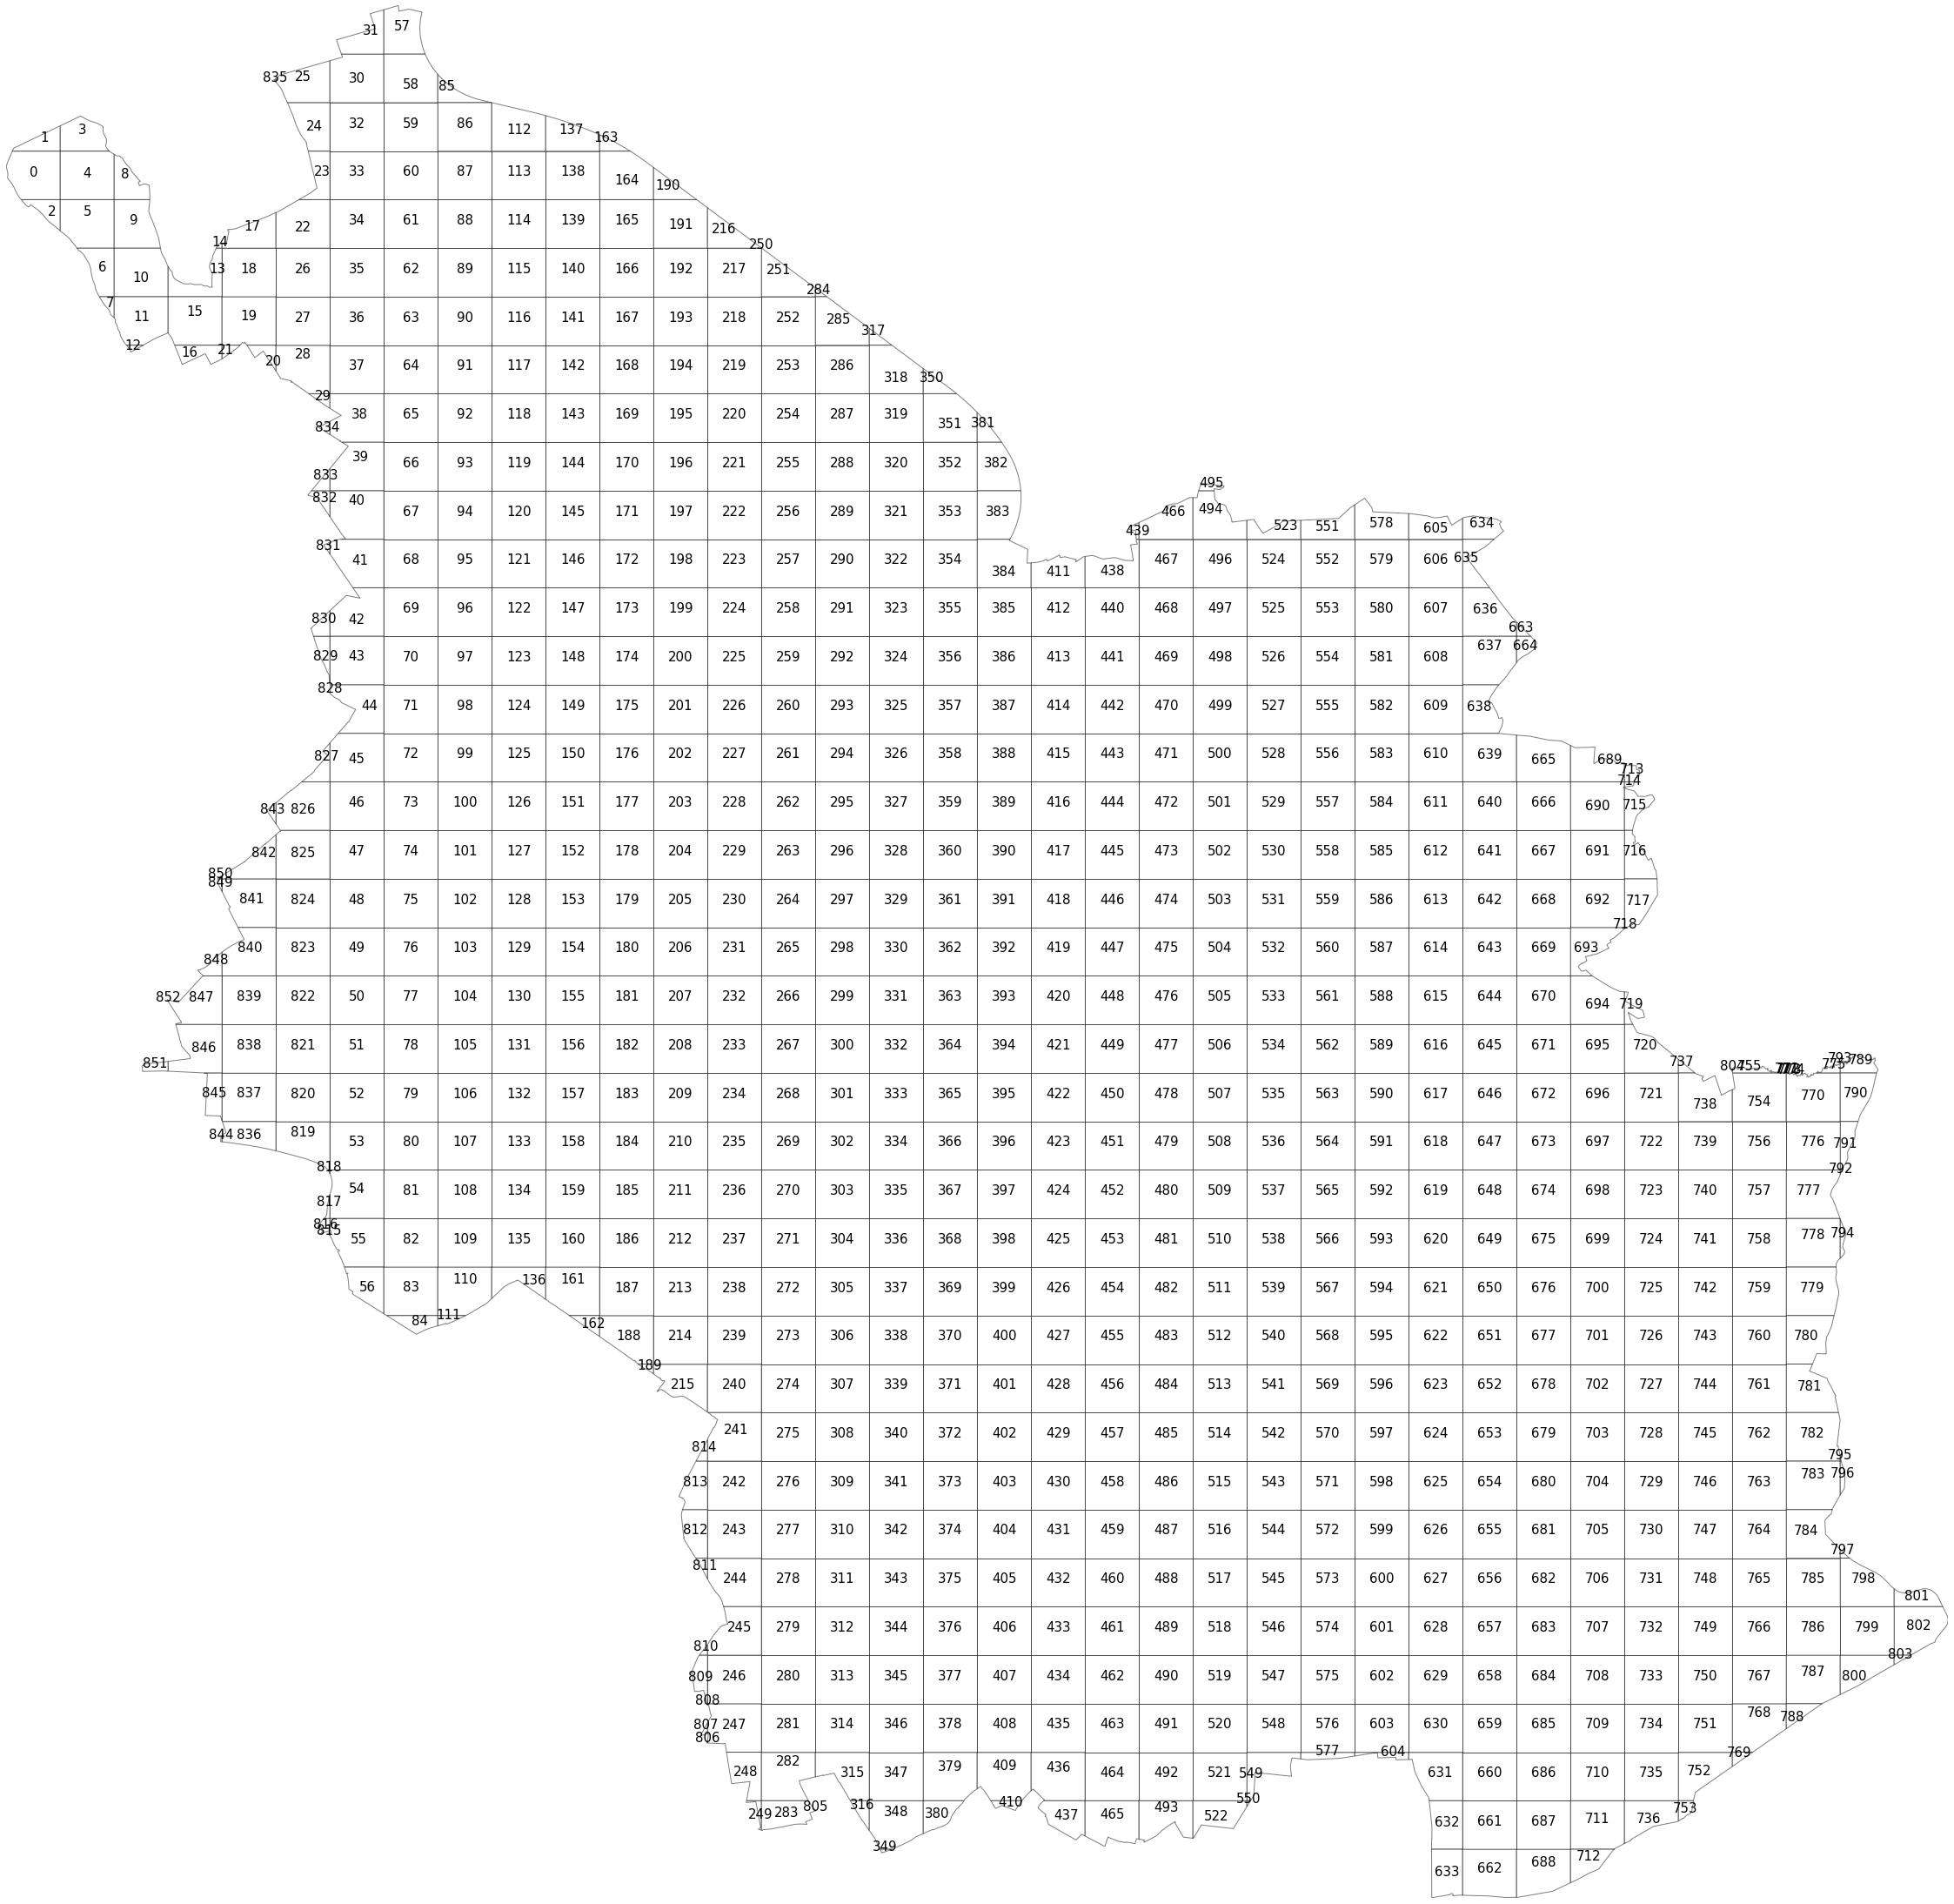

In [8]:
polylist = [p for p in geometry_cut]

# plot city
west, south, east, north = city.unary_union.bounds

fig, ax = plt.subplots(figsize=(40,40))
for polygon, n in zip(geometry_cut, np.arange(len(polylist))):
    p = polygon.representative_point().coords[:][0]
    patch = PolygonPatch(polygon, fc='#ffffff', ec='#000000', alpha=0.5, zorder=2)
    ax.add_patch(patch)
    plt.annotate(s=n, xy=p, horizontalalignment='center', size=15)
    
ax.set_xlim(west, east)
ax.set_ylim(south, north)
ax.axis('off')
plt.show()

In [9]:
polyframe = gpd.GeoDataFrame(geometry=polylist)
polyframe.crs = city.crs
print(polyframe.crs)
polyframe.head()

+proj=utm +zone=32 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs


geometry
0  POLYGON ((343914.677 5659037.268, 343917.321 5...
1  POLYGON ((343997.888 5659267.012, 344003.993 5...
2  POLYGON ((344658.000 5658530.657, 344658.000 5...
3  POLYGON ((344658.000 5659650.574, 344742.612 5...
4  POLYGON ((345334.900 5659267.012, 345341.481 5...

In [10]:
len(polyframe)

853

(6591355.133100571, 6636338.479170892)

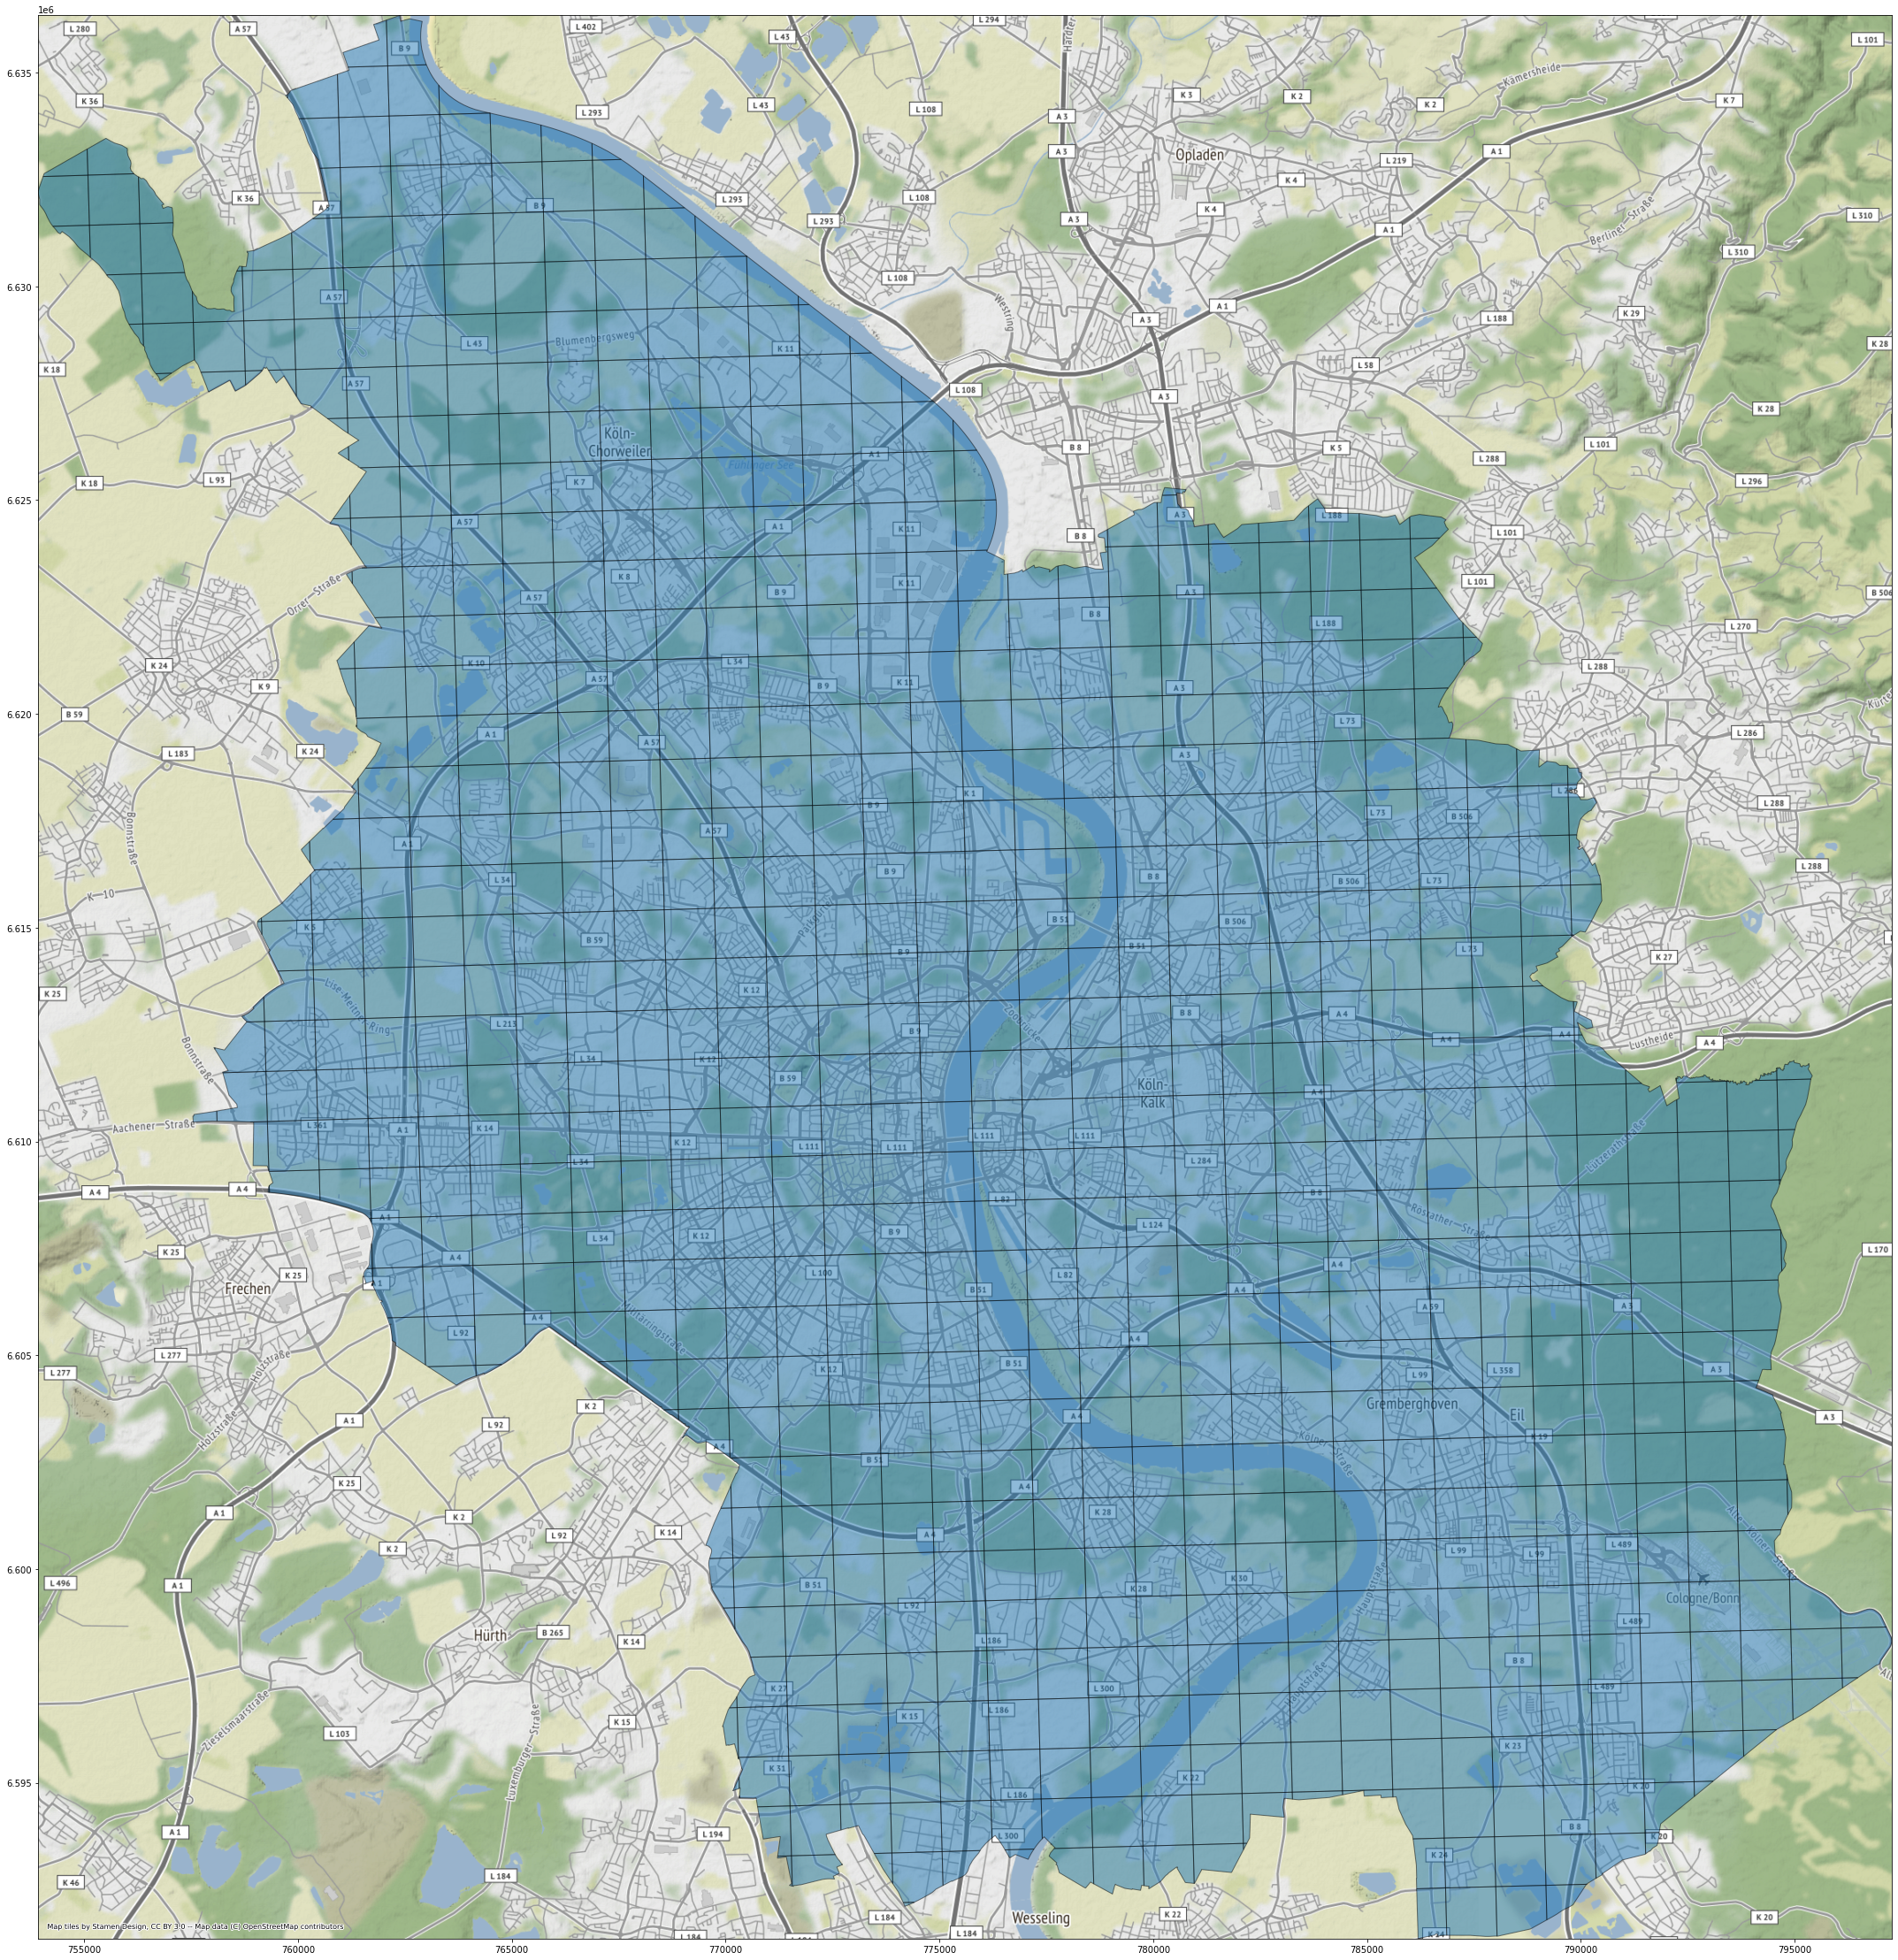

In [11]:
import contextily as ctx
# ctx uses epsg:3857
polyframe_3857 = polyframe.to_crs(epsg=3857)
west, south, east, north = polyframe_3857.unary_union.bounds

ax = polyframe_3857.plot(figsize=(40,40), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax, zoom=13)
ax.set_xlim(west, east)
ax.set_ylim(south, north)

In [14]:
l = len(polylist)
OD_matrix = np.zeros(shape=(l,l))
print(OD_matrix)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
